# Yuyu Fan & Yining Shen

In [108]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [109]:
abalone=pd.read_csv(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning\Data\abalone.csv")
abalone.head()

,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [110]:
abalone_X=abalone.iloc[:,:7]
abalone_Y = abalone.iloc[:,7]

In [111]:
## problem a##
count = 0
test_r2 = 0
train_r2 = 0
for i in range(0,10,1):
    X_train,X_test,Y_train,Y_test = train_test_split(abalone_X,abalone_Y,test_size =0.2)
    lr = linear_model.Ridge(alpha = 0.0001)
    lr.fit(X_train,Y_train)
    test_predict = lr.predict(X_test)
    train_predict = lr.predict(X_train)
    test_r2+=(r2_score(Y_test,test_predict))
    train_r2+=(r2_score(Y_train,train_predict))
    count +=1
avg_test_r2 = test_r2 / count
avg_train_r2 = train_r2/ count

In [112]:
print('The Average Training R^2 :%.3f '%avg_train_r2)
print('The Average Testing R^2 :%.3f '%avg_test_r2)

The Average Training R^2 :0.525 
The Average Testing R^2 :0.535 


In [113]:
## problem b##
avg_test_r2=[]
avg_train_r2=[]
for i in range(1,8,1):
    count = 0
    test_r2 = 0
    train_r2 = 0
    for j in range(1,11,1):
        X_train,X_test,Y_train,Y_test = train_test_split(abalone_X,abalone_Y,test_size =0.2)
        clf = DecisionTreeRegressor(criterion="mse", max_depth=i)
        # Train Decision Tree Classifer
        clf = clf.fit(X_train,Y_train)
        
        #Predict the response for test dataset
        test_predict = clf.predict(X_test)
        train_predict = clf.predict(X_train)
        test_r2+=(r2_score(Y_test,test_predict))
        train_r2+=(r2_score(Y_train,train_predict))
        count +=1
    avg_test_r2.append(test_r2 / count)
    avg_train_r2.append(train_r2 / count)

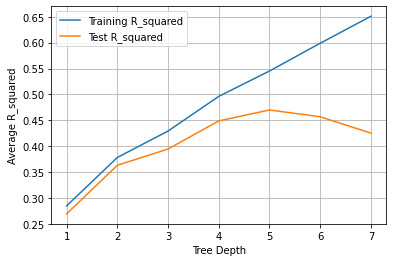

In [114]:
plt.plot(range(1,8,1), avg_train_r2, label = 'Training R_squared' )
plt.plot(range(1,8,1), avg_test_r2, label = 'Test R_squared' )
plt.grid()
plt.xlabel('Tree Depth')
plt.ylabel('Average R_squared')
plt.legend()

In [115]:
## problem c##
avg_test_r2=[]
avg_train_r2=[]
kTrees =[10,30,100]
for i in kTrees:
    count = 0
    test_r2 = 0
    train_r2 = 0
    for j in range(1,11,1):
        X_train,X_test,Y_train,Y_test = train_test_split(abalone_X,abalone_Y,test_size =0.2)
        clf = RandomForestClassifier(n_estimators=i)
        # Train Decision Tree Classifer
        clf = clf.fit(X_train,Y_train)
        
        #Predict the response for test dataset
        test_predict = clf.predict(X_test)
        train_predict = clf.predict(X_train)
        test_r2+=(r2_score(Y_test,test_predict))
        train_r2+=(r2_score(Y_train,train_predict))
        count +=1
    avg_test_r2.append(test_r2 / count)
    avg_train_r2.append(train_r2 / count)

The Average Training R_squared:
[0.9802026502851, 0.9999281488735251, 1.0]
The Average Testing R_squared:
[0.29797018590536234, 0.3616379471139725, 0.367754903387811]


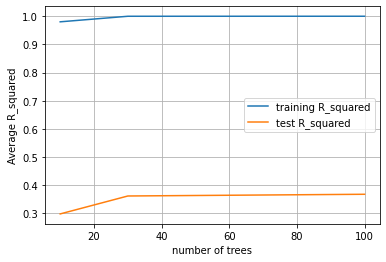

In [117]:
print('The Average Training R_squared:')
print(avg_train_r2)
print('The Average Testing R_squared:')
print(avg_test_r2)

plt.plot(kTrees,avg_train_r2, label = 'training R_squared' )
plt.plot(kTrees, avg_test_r2, label = 'test R_squared')
plt.xlabel('number of trees')
plt.ylabel('Average R_squared')
plt.grid()
plt.legend()